# introductory text (explain: dataset, task)

For this model, I choose to use a dataset from kaggle known as the Large Scale Fish Dataset. The task I choose to pursue is to create a identifier for the 9 different species in the dataset using a CNN from keras and pieces from the opencv library.

# import requisite modules

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
from PIL import Image
import pathlib
import cv2
from keras import models
import os
import os, glob
from numpy import linalg as LA
import warnings
warnings.filterwarnings('ignore')

2023-04-27 14:42:51.191025: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-27 14:42:51.433417: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-04-27 14:42:51.433496: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-04-27 14:42:52.148397: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-04-2

# helper functions (if necessary)

# pre-process, analyze dataset

In [8]:
#N/A

# visualize dataset

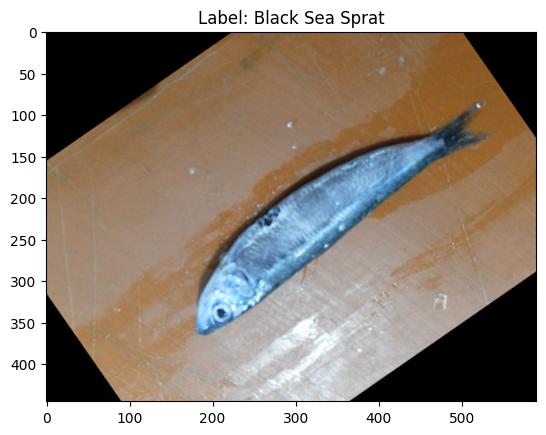

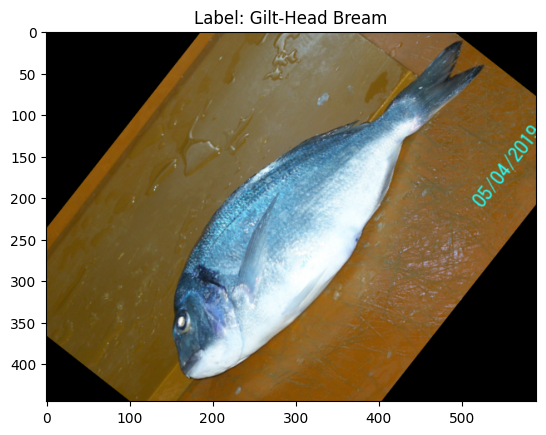

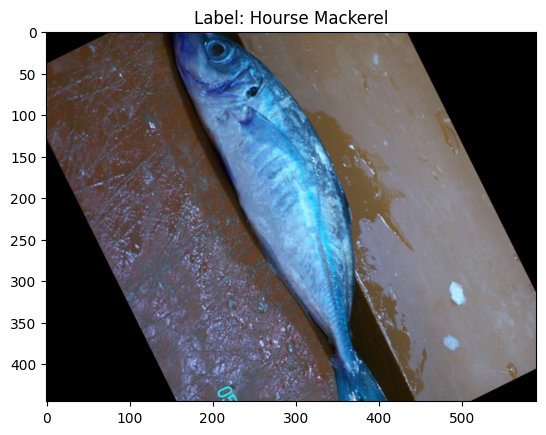

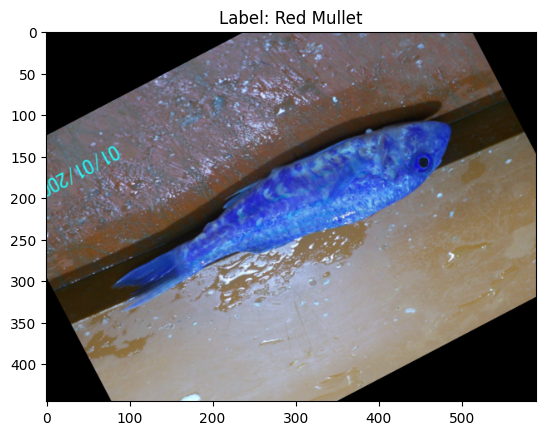

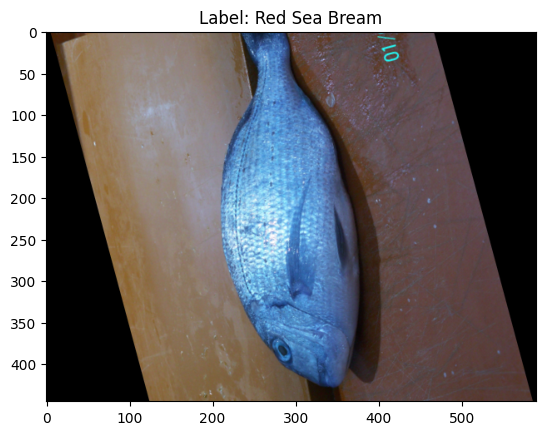

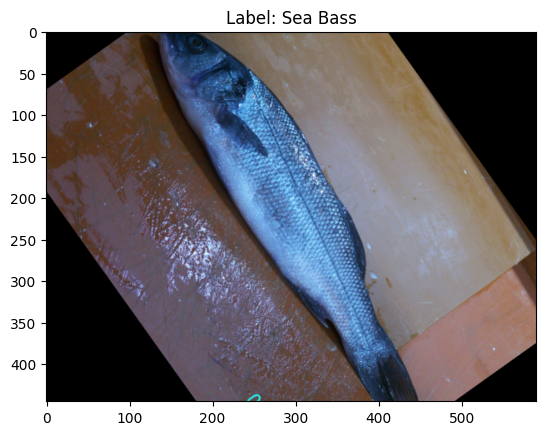

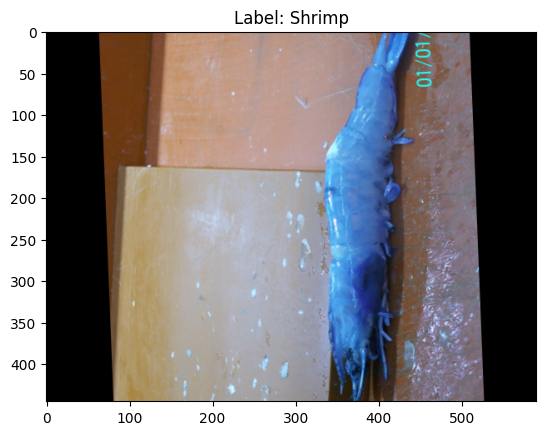

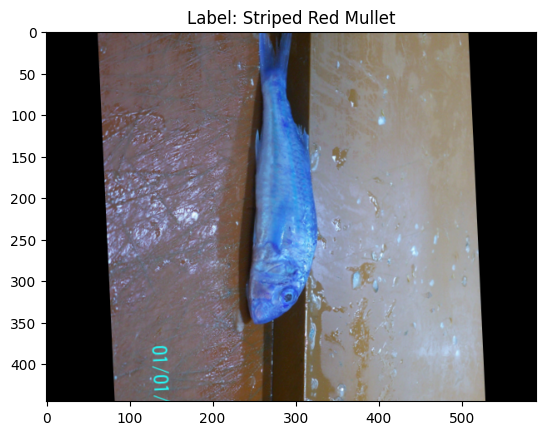

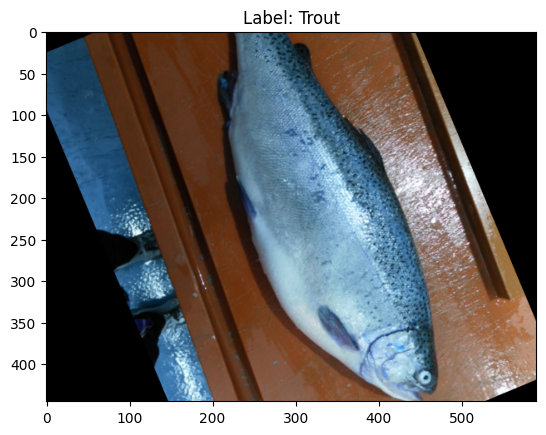

In [6]:
Labels = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel", "Red Mullet", "Red Sea Bream", "Sea Bass", "Shrimp", "Striped Red Mullet", "Trout"]
for i in range(len(Labels)):
    #Image Preprocessing and Prediction#
    os.chdir("fish_data")
    os.chdir(Labels[i])
    img = cv2.imread("00001.png")
    img_array1 = np.array(img)

    plt.imshow(img_array1)
    vsTitle = "Label: {actual}".format(actual = Labels[i])
    plt.title(vsTitle)
    plt.show()
    os.chdir("..")
    os.chdir("..")

# experiment with algorithms, feature sets, parameters, etc.,

In [10]:
####The model was trained externally and exported to fishmodel.h5####
data_dir = pathlib.Path("fish_data")
image_count = len(list(data_dir.glob('*.png')))

#Batch and Image Size#
batch_size = 10
img_height = 445
img_width = 590

#Train and Validate Set#
train_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="training",
	seed=770,
	image_size=(img_height, img_width),
	batch_size=batch_size)
	
val_ds = tf.keras.utils.image_dataset_from_directory(
	data_dir,
	validation_split=0.2,
	subset="validation",
	seed=770,
	image_size=(img_height, img_width),
	batch_size=batch_size)

#Class Names#
class_names = train_ds.class_names

#Overlaps and Preprocessing#
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
num_classes = len(class_names)

#Build Model#
model = Sequential([
	#adjust layers
	layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Dropout(0.2),
	layers.Conv2D(128, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Conv2D(32, 3, padding='same', activation='relu'),
	layers.MaxPooling2D(),
	layers.Flatten(),
	layers.Dense(128, activation='relu'),
	layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.summary()

#Checkpoint Callback#
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath="checkpoints/checkpt", save_weights_only=True, verbose=1)

#Fit Model#
epochs=5
history = model.fit(
	train_ds,
	validation_data=val_ds,
	epochs=epochs,
	callbacks=[cp_callback]
)

#Export Model#
model.save('fishmodel.h5', include_optimizer=True)

# visualize experimental results

2023-04-27 14:43:00.175632: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/madjack/.local/lib/python3.10/site-packages/cv2/../../lib64:
2023-04-27 14:43:00.175663: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-04-27 14:43:00.175682: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (madjack-VirtualBox): /proc/driver/nvidia/version does not exist
2023-04-27 14:43:00.175889: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate 

1/1 [==============================] - 0s 302ms/step


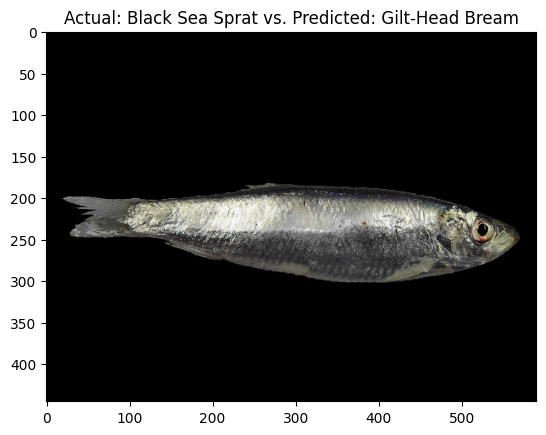

1/1 [==============================] - 0s 116ms/step


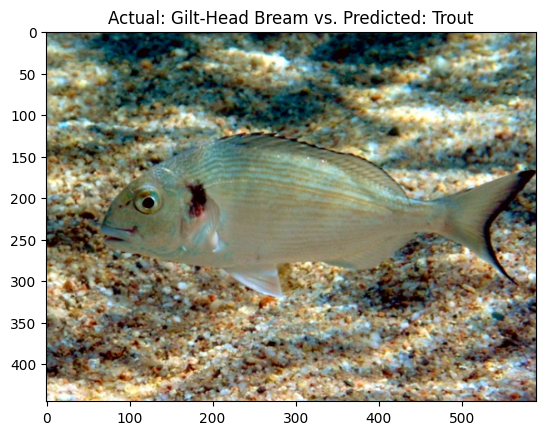

1/1 [==============================] - 0s 146ms/step


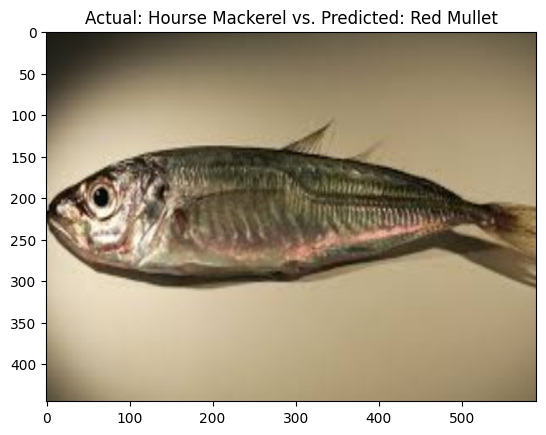

1/1 [==============================] - 0s 98ms/step


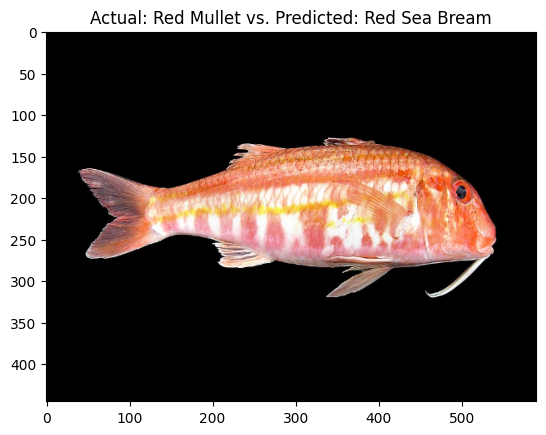

1/1 [==============================] - 0s 109ms/step


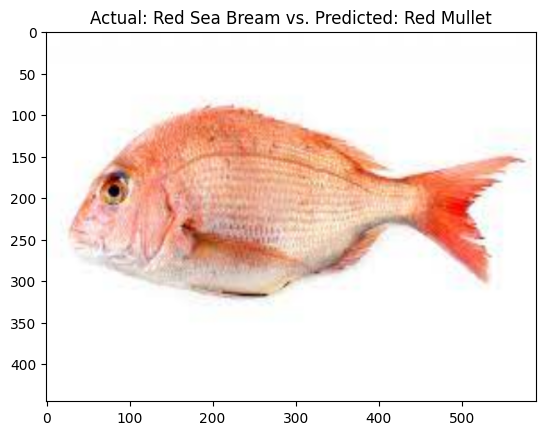

1/1 [==============================] - 0s 103ms/step


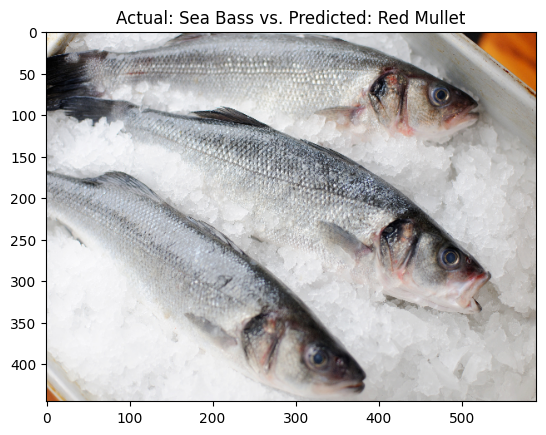

1/1 [==============================] - 0s 220ms/step


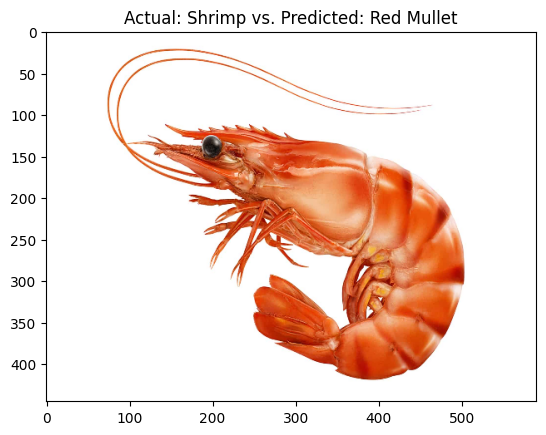

1/1 [==============================] - 0s 147ms/step


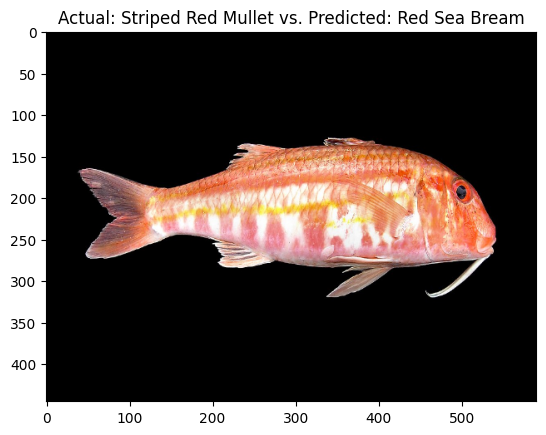

1/1 [==============================] - 0s 97ms/step


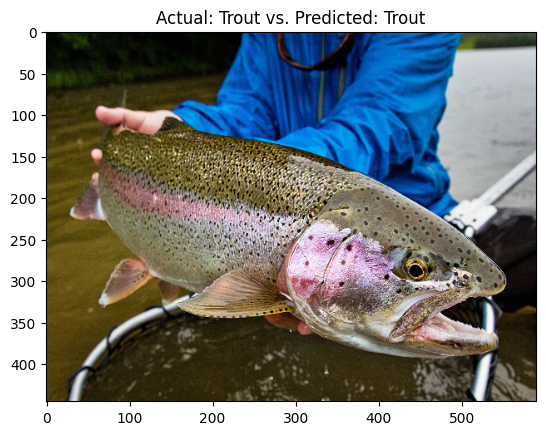

In [2]:
np.set_printoptions(threshold= np.inf)
np.set_printoptions(suppress=True)

#Load Model and Checkpoints#
model = models.load_model('fishmodel.h5')
model.load_weights(tf.train.latest_checkpoint("checkpoints"))
Labels = ["Black Sea Sprat", "Gilt-Head Bream", "Hourse Mackerel", "Red Mullet", "Red Sea Bream", "Sea Bass", "Shrimp", "Striped Red Mullet", "Trout"]

os.chdir("fishTesting")

for i in range(1, 10):
    #Image Preprocessing and Prediction#
    name = str(i) + ".jpg"
    img = cv2.imread(name)
    img = cv2.resize(img, dsize=[590, 445])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_array1 = np.array(img)
    img_array = np.expand_dims(img_array1, axis=0)
    networkOutput = model.predict(img_array)

    #Label and Display Image#
    classLabel = np.argmax(networkOutput)

    plt.imshow(img_array1)
    vsTitle = "Actual: {actual} vs. Predicted: {predict}".format(actual = Labels[i - 1], predict = Labels[classLabel])
    plt.title(vsTitle)
    plt.show()
os.chdir("..")

# analyze / explain experimental results

The results of the CNN predictions show that it only got one fish correct out of nine species. This is because of the features that are collected from each photo. The main features that are most likely extracted are eyesize, color, and the size of the fish. Another issue comes from the dataset with the photos that the model trained on had specific orientations on the fish from different circling angles. The training images also all have the same background and the colors and markings are the fish remain the same throughout. These issues explain why the model does not predict the photos above correctly. The are from different angles, with different backgrounds, and the fish are different in terms of color and markings.

# conclusion 

Overall, this task is a difficult one that would require more thought into the training data. Varieties of color, backgrounds, and markings on the fish could help the model predict better on images it has not seen. With images that it has seen, the model had a 100% prediction score. In other words, the issues from this model stems from the training images.